In [113]:
import pandas as pd
import pandas_profiling as pp
import seaborn as sb
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 150)
plt.style.use('seaborn-whitegrid')

df = pd.read_csv("mag_outliers.csv")

In [114]:
df.head()

,Participant,Zoom,Track,Gender,Race,name,time_gaze,gaze_1_x,gaze_1_y,gaze_2_x,gaze_2_y,gaze_3_x,gaze_3_y,gaze_4_x,gaze_4_y,gaze_5_x,gaze_5_y,gaze_at_click_x,gaze_at_click_y,centroid_x,centroid_y,mouse_x,mouse_y,dis_gaze_mouse,dis_centroid_mouse,time_to_find,misclicks,x1dist_click,x2dist_click,x3dist_click,x4dist_click,x5dist_click,onclick_xdist,y1dist_click,y2dist_click,y3dist_click,y4dist_click,y5dist_click,onclick_ydist,centroid_x.1,centroid_y.1,centroidx_dist_clicl,centroidy_dist_click
0,2.0,12.0,A,F,A,a1.html,1655817374530,804.8,727.6,812.0,730.36,817.2,732.52,821.4,733.36,829.2,732.80,825.2,732.68,816.92,731.328,912.0,75.0,663.383164,663.179199,38651.0,0.0,-107.2,-100.0,-94.8,-90.6,-82.8,-86.8,652.6,655.36,657.52,658.36,657.80,657.68,816.92,731.328,-95.08,656.328
1,2.0,12.0,A,F,A,a2.html,1655817404145,174.4,958.2,156.2,960.20,156.2,960.20,156.2,960.20,156.2,960.20,200.0,993.60,159.84,959.800,701.0,336.0,826.703550,825.821158,26753.0,0.0,-526.6,-544.8,-544.8,-544.8,-544.8,-501.0,622.2,624.20,624.20,624.20,624.20,657.60,159.84,959.800,-541.16,623.800
2,2.0,12.0,A,F,A,a3.html,1655817437431,212.6,880.8,214.8,733.24,221.2,734.00,228.0,734.20,250.2,734.68,281.6,903.00,225.36,763.384,327.0,208.0,696.481270,564.607897,30946.0,0.0,-114.4,-112.2,-105.8,-99.0,-76.8,-45.4,672.8,525.24,526.00,526.20,526.68,695.00,225.36,763.384,-101.64,555.384
3,2.0,12.0,A,F,A,a4.html,1655817453617,411.2,1033.8,391.0,1037.00,372.8,1042.60,372.8,1042.60,348.8,1036.80,335.4,1034.60,379.32,1038.560,414.0,104.0,933.913443,935.203238,13555.0,0.0,-2.8,-23.0,-41.2,-41.2,-65.2,-78.6,929.8,933.00,938.60,938.60,932.80,930.60,379.32,1038.560,-34.68,934.560
4,2.0,12.0,A,F,A,a5.html,1655817491609,991.0,877.2,997.8,731.44,1070.8,731.16,1085.4,730.52,1094.4,731.68,1094.6,731.80,1047.88,760.400,902.0,206.0,559.964642,573.271606,33400.0,0.0,89.0,95.8,168.8,183.4,192.4,192.6,671.2,525.44,525.16,524.52,525.68,525.80,1047.88,760.400,145.88,554.400


In [115]:
df.describe()
#df.describe().to_csv("desc_stats.csv")

,Participant,Zoom,gaze_1_x,gaze_1_y,gaze_2_x,gaze_2_y,gaze_3_x,gaze_3_y,gaze_4_x,gaze_4_y,gaze_5_x,gaze_5_y,gaze_at_click_x,gaze_at_click_y,centroid_x,centroid_y,mouse_x,mouse_y,dis_gaze_mouse,dis_centroid_mouse,time_to_find,misclicks,x1dist_click,x2dist_click,x3dist_click,x4dist_click,x5dist_click,onclick_xdist,y1dist_click,y2dist_click,y3dist_click,y4dist_click,y5dist_click,onclick_ydist,centroid_x.1,centroid_y.1,centroidx_dist_clicl,centroidy_dist_click
count,166.000000,166.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,172.000000,170.000000,146.000000,146.000000,166.000000,166.000000,166.000000,146.000000,157.000000,166.000000,146.000000,146.000000,146.000000,146.000000,146.000000,166.000000,146.000000,146.000000,146.000000,146.000000,146.000000,166.000000,146.000000,146.000000,146.000000,146.000000
mean,5.246988,5.828313,634.512120,724.638950,633.696795,724.805473,643.699250,734.916474,645.950260,741.542357,642.637438,741.734381,613.689229,828.386622,650.695562,745.870849,619.578313,205.590361,713.849300,608.670913,11623.668790,0.150602,26.601918,25.770411,35.952603,38.198904,34.830685,2.837590,531.504932,531.694795,542.015068,548.745205,548.921644,624.903373,650.695562,745.870849,32.270904,540.576329
std,2.901278,4.314779,352.708603,380.339808,352.649702,377.409027,356.145840,376.904605,363.598691,381.399990,361.831033,384.260855,379.583134,460.368911,339.128394,357.265421,245.609329,88.259402,419.448859,318.915181,8682.275737,0.358743,235.522972,237.249258,241.881194,249.849120,250.497527,240.322628,355.916058,351.799105,349.537571,353.418901,356.735424,437.333534,339.128394,357.265421,239.786326,349.224909
min,1.000000,1.000000,-251.600000,-168.205838,-243.400000,-160.570719,-243.400000,-148.128498,-232.600000,-152.257874,-227.000000,-159.327202,-293.233124,-264.129776,-239.600000,-21.408000,109.000000,71.000000,20.889232,18.286432,1333.000000,0.000000,-631.800000,-623.960000,-623.320000,-623.160000,-623.000000,-619.200000,-198.000000,-198.000000,-234.800000,-246.040000,-360.200000,-183.000000,-239.600000,-21.408000,-623.568000,-247.408000
25%,3.000000,4.000000,368.150000,439.400000,358.900000,449.350000,352.250000,463.500000,347.496672,461.700000,352.400000,470.800000,324.000000,480.750000,380.820000,469.830000,363.000000,125.250000,370.486342,359.532079,4804.000000,0.000000,-100.550000,-99.750000,-91.700000,-91.500000,-98.300000,-136.700000,256.600000,257.000000,299.650000,298.200000,300.600000,294.600000,380.820000,469.830000,-95.530000,292.910000
50%,5.000000,5.000000,721.400000,640.800000,716.300000,639.800000,716.800000,657.000000,706.100000,655.100000,709.500000,644.300000,670.600000,721.660000,733.780000,638.980000,701.000000,195.500000,662.196929,554.426189,9558.000000,0.000000,0.400000,-4.600000,5.600000,7.600000,16.000000,9.100000,475.900000,470.000000,483.000000,483.000000,470.800000,538.900000,733.780000,638.980000,8.500000,474.760000
75%,8.000000,7.000000,877.950000,1050.950000,883.200000,1067.850000,891.450000,1067.850000,899.550000,1082.000000,901.000000,1088.150000,885.600000,1171.550000,895.320000,1068.000000,815.750000,259.250000,1016.249167,880.959667,15308.000000,0.000000,177.750000,171.000000,178.350000,200.100000,191.450000,151.500000,854.400000,858.500000,861.150000,875.500000,883.450000,970.450000,895.320000,1068.000000,183.800000,864.530000
max,10.000000,18.000000,1487.232671,1641.804742,1486.314210,1634.549349,1504.562677,1642.747676,1525.445801,1660.337326,1517.866598,1667.759531,1538.064932,1945.373191,1416.680000,1475.760000,998.000000,365.000000,2036.622822,1351.978108,40978.000000,1.000000,659.600000,659.400000,732.800000,732.800000,788.400000,659.000000,1325.400000,1307.600000,1323.800000,1323.800000,1367.000000,1728.000000,1416.680000,1475.760000,661.400000,1325.960000


<AxesSubplot:>

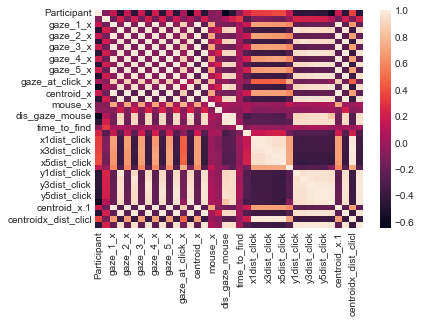

In [116]:
corr = df.corr()
sb.heatmap(corr)

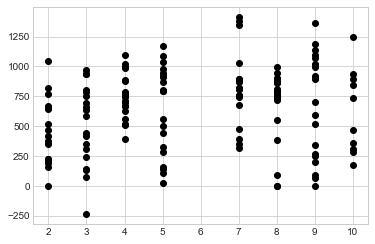

In [117]:
x = df.Participant
y = df.centroid_x

plt.plot(x, y, 'o', color='black');

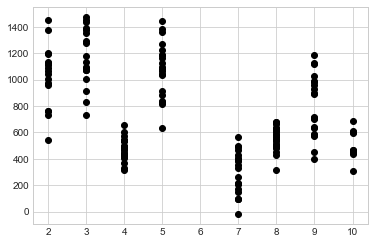

In [118]:
x = df.Participant
y = df.centroid_y

plt.plot(x, y, 'o', color='black');

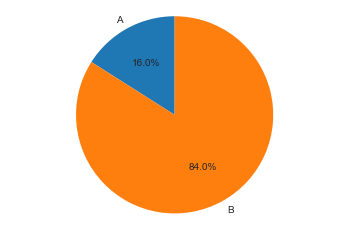

In [119]:
labels = 'A', 'B'
acount = 0;
for i in range(len(df.misclicks.dropna())):
    if(df.Track[i]=='A'):
        acount = acount + df.misclicks[i]
bcount = sum(df.misclicks.dropna())-acount
sizes = [acount,bcount]
explode = (0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()
#Number of misclicks by A or B track

In [120]:
print(acount, " ", bcount)

4.0   21.0


In [121]:
avgy1 = 0.0;
avgy2 = 0.0;
avgy3 = 0.0;
avgy4 = 0.0;
avgy5 = 0.0;
avgx1 = 0.0;
avgx2 = 0.0;
avgx3 = 0.0;
avgx4 = 0.0;
avgx5 = 0.0;
tot = len(df.y1dist_click)
def avg(vals, av):
    for i in range(len(vals)):
        inst = float(vals[i])
        if(not math.isnan(inst)):
            av+=inst
    return av

avgy1 = avg(df.y1dist_click,avgy1) / tot
avgy2 = avg(df.y2dist_click,avgy2) / tot
avgy3 = avg(df.y3dist_click,avgy3) / tot
avgy4 = avg(df.y4dist_click,avgy4) / tot
avgy5 = avg(df.y5dist_click,avgy5) / tot
avgys = [avgy5, avgy4, avgy3, avgy2, avgy1]
avgx1 = avg(df.x1dist_click,avgx1) / tot
avgx2 = avg(df.x2dist_click,avgx2) / tot
avgx3 = avg(df.x3dist_click,avgx3) / tot
avgx4 = avg(df.x4dist_click,avgx4) / tot
avgx5 = avg(df.x5dist_click,avgx5) / tot
avgxs = [avgx5,avgx4,avgx3,avgx2,avgx1]
print(avgxs,avgys)

[29.058742857142857, 31.868800000000004, 29.994742857142846, 21.4998857142857, 22.193600000000007] [457.9574857142859, 457.8102857142855, 452.1954285714284, 443.58537142857153, 443.42697142857145]


Text(0, 0.5, 'Average Gaze-Click Y Distance')

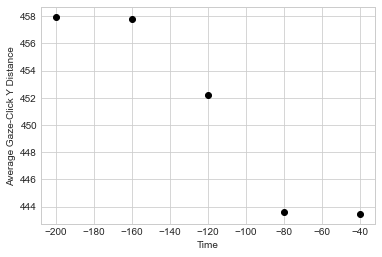

In [122]:
x = [-200,-160,-120,-80,-40]
y = avgys

plt.plot(x, y, 'o', color='black');
plt.xlabel("Time")
plt.ylabel("Average Gaze-Click Y Distance")

Text(0, 0.5, 'Average Gaze-Click X Distance')

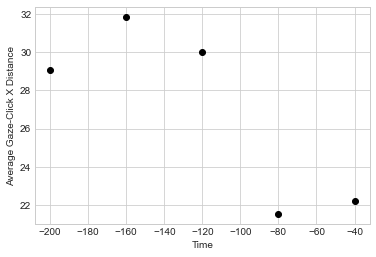

In [123]:
x = [-200,-160,-120,-80,-40]
y = avgxs

plt.plot(x, y, 'o', color='black');
plt.xlabel("Time")
plt.ylabel("Average Gaze-Click X Distance")

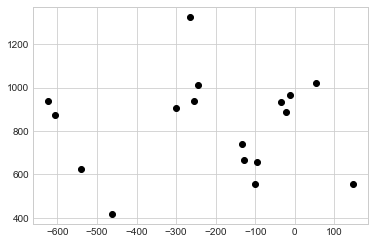

In [124]:
x = df[df['Participant']==2].centroidx_dist_clicl
y = df[df['Participant']==2].centroidy_dist_click

plt.plot(x, y, 'o', color='black');

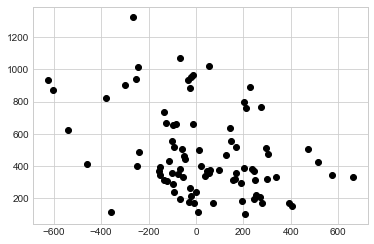

In [125]:
x = df[df['Race']=='A'].centroidx_dist_clicl
y = df[df['Race']=='A'].centroidy_dist_click
asumx=np.sum(x.abs())
asumy=np.sum(y.abs())
aavgx = asumx/len(x)
aavgy = asumy/len(y)

plt.plot(x, y, 'o', color='black');

16223.487999999998 10433.2 41733.880000000005 37901.08
176.83389830508474 186.47687356321836 642.391186440678 479.69977011494257


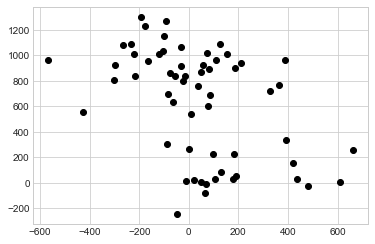

In [126]:
x = df[df['Race']=='W'].centroidx_dist_clicl.dropna()
y = df[df['Race']=='W'].centroidy_dist_click.dropna()
wsumx=np.sum(x.abs())
wsumy=np.sum(y.abs())
print(asumx,wsumx,asumy,wsumy)
wavgx = wsumx/len(x)
wavgy = wsumy/len(y)
print(wavgx,aavgx,wavgy,aavgy)

plt.plot(x, y, 'o', color='black');

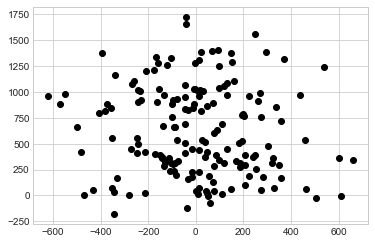

In [127]:
x = df.onclick_xdist
y = df.onclick_ydist

plt.plot(x, y, 'o', color='black');

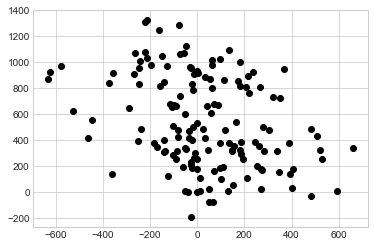

In [128]:
x = df.x1dist_click
y = df.y1dist_click

plt.plot(x, y, 'o', color='black');

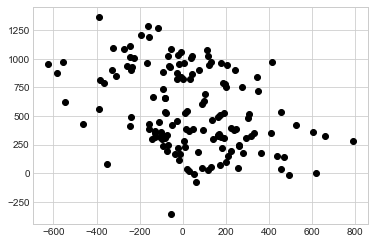

In [129]:
x = df.x5dist_click
y = df.y5dist_click

plt.plot(x, y, 'o', color='black');

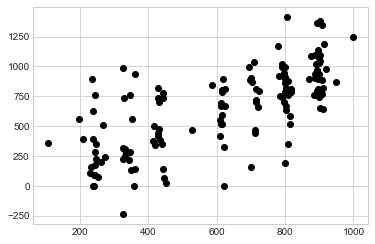

In [130]:
x = df.mouse_x
y = df.centroid_x

plt.plot(x, y, 'o', color='black');

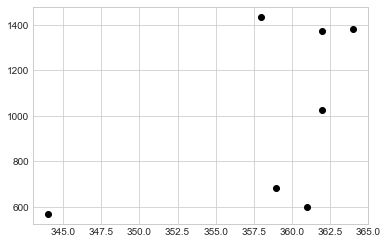

In [131]:
x = df[df['name']=='b1.html'].mouse_y
y = df[df['name']=='b1.html'].centroid_y

plt.plot(x, y, 'o', color='black');

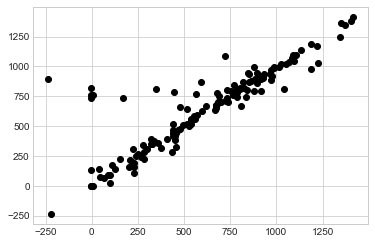

In [132]:
x = df.gaze_at_click_x
y = df.centroid_x

plt.plot(x, y, 'o', color='black');

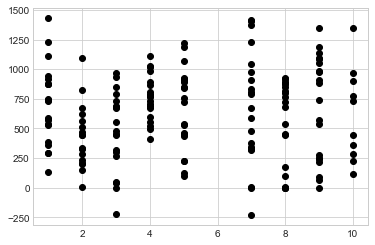

In [133]:
x = df.Participant
y = df.gaze_at_click_x

plt.plot(x, y, 'o', color='black');

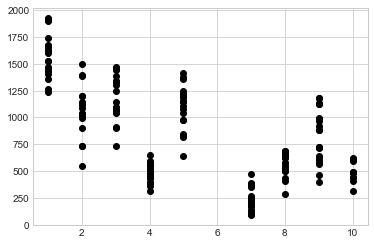

In [134]:
x = df.Participant
y = df.gaze_at_click_y

plt.plot(x, y, 'o', color='black');

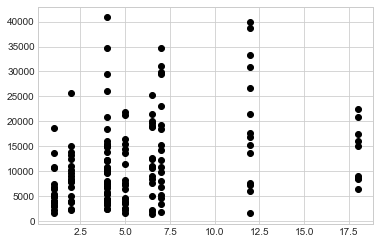

In [135]:
x = df.Zoom
y = df.time_to_find

plt.plot(x, y, 'o', color='black');

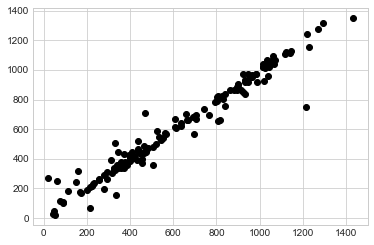

In [136]:
x = df.dis_gaze_mouse
y = df.dis_centroid_mouse

plt.plot(x, y, 'o', color='black');

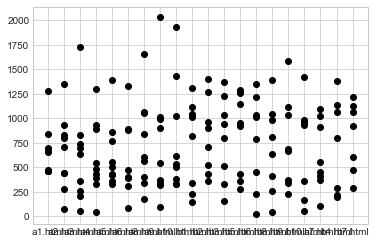

In [137]:
x = df.name.dropna()
y = df.dis_gaze_mouse.dropna()

plt.plot(x, y, 'o', color='black');

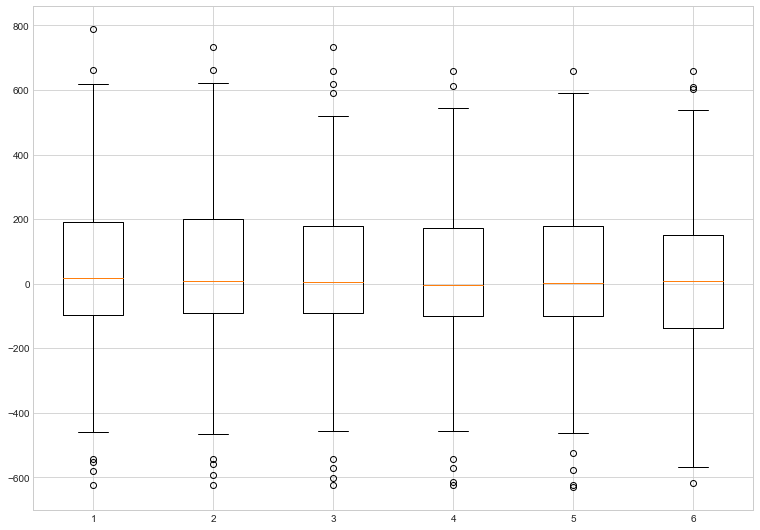

In [138]:
d1 = df.x5dist_click.array.dropna()
d2 = df.x4dist_click.array.dropna()
d3 = df.x3dist_click.array.dropna()
d4 = df.x2dist_click.array.dropna()
d5 = df.x1dist_click.array.dropna()
d6 = df.onclick_xdist.array.dropna()
data = [d1,d2,d3,d4,d5,d6]
 
fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(data)
 
# show plot
plt.show()

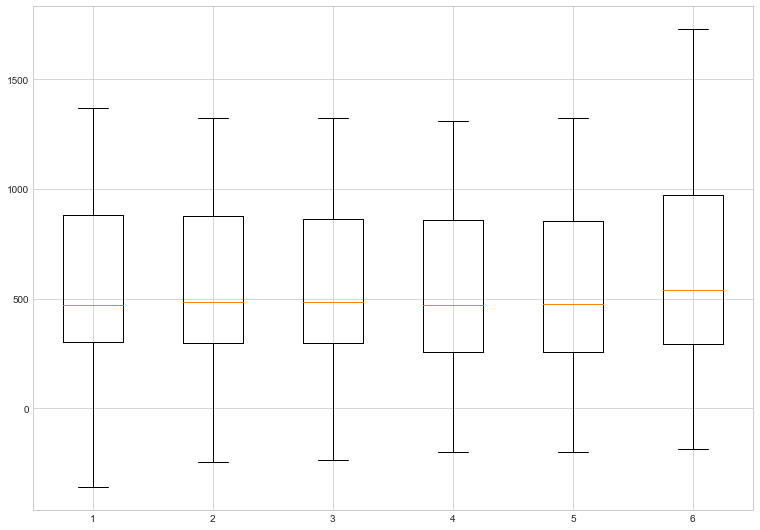

In [139]:
d1 = df.y5dist_click.array.dropna()
d2 = df.y4dist_click.array.dropna()
d3 = df.y3dist_click.array.dropna()
d4 = df.y2dist_click.array.dropna()
d5 = df.y1dist_click.array.dropna()
d6 = df.onclick_ydist.array.dropna()
data = [d1,d2,d3,d4,d5,d6]
 
fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(data)
 
# show plot
plt.show()

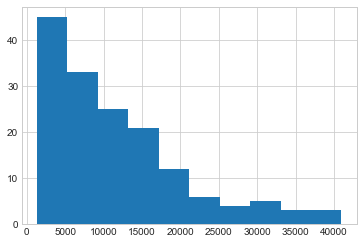

In [140]:
plt.hist(df.time_to_find.dropna())
plt.show() 